In [20]:
#импортирую библитеку

import pandas as pd
import seaborn as sns

In [3]:
#импортирую данные

bookings = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv', sep=';')

In [4]:
bookings

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


In [5]:
#Функция, которая приведит названия столбцов к нижнему регистру и замените пробелы на знак нижнего подчёркивания.

def change(name):
    new_name = name.replace(' ', '_')
    new_name=str.lower(str(new_name))
    return(new_name)

In [6]:
#переименовываю названия столбцов

bookings=bookings.rename(columns=change)

In [7]:
#Пользователи из каких стран совершили наибольшее число успешных бронирований?

bookings.query('is_canceled ==0') \
    .country \
    .value_counts()[:5]

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: country, dtype: int64

In [8]:
#На сколько ночей (stays_total_nights)  в среднем бронируют отели типа City Hotel? Resort Hotel?

bookings \
    .groupby(['hotel'], as_index=False) \
    .aggregate({'stays_total_nights': 'mean'}) \
    .round(2)

,hotel,stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


In [9]:
#Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type).
#Сколько подобных наблюдений встретилось в датасете?

bookings \
    .query('assigned_room_type != reserved_room_type') \
    .count()

hotel                        14917
is_canceled                  14917
lead_time                    14917
arrival_full_date            14917
arrival_date_year            14917
arrival_date_month           14917
arrival_date_week_number     14917
arrival_date_day_of_month    14917
stays_in_weekend_nights      14917
stays_in_week_nights         14917
stays_total_nights           14917
adults                       14917
children                     14917
babies                       14917
meal                         14917
country                      14699
reserved_room_type           14917
assigned_room_type           14917
customer_type                14917
reservation_status           14917
reservation_status_date      14917
dtype: int64

In [10]:
#На какой месяц чаще всего оформляли бронь в 2016 году? Изменился ли самый популярный месяц в 2017 году?

bookings.query("hotel == 'City Hotel'").groupby(["arrival_date_year", "arrival_date_month"])\
    .agg({"is_canceled": "sum"})\
    .sort_values(["arrival_date_year", "is_canceled"], ascending = [True, False])\
    .groupby("arrival_date_year")\
    .head(1)

,,is_canceled
arrival_date_year,arrival_date_month,
2015,September,1543
2016,October,1947
2017,May,2217


In [11]:
#Посмотрите на числовые характеристики трёх колонок: adults, children и babies. Какая из них имеет наибольшее среднее значение?

bookings.agg({'adults': 'mean', 'children': 'mean', 'babies': 'mean'}).idxmax()

'adults'

In [12]:
bookings["total_kids"]= bookings["children"]+bookings["babies"]

In [13]:
#Для отелей какого типа среднее значение переменной оказалось наибольшим?

bookings \
    .groupby('hotel') \
    .aggregate({'total_kids': 'mean'}).round(2).max()

total_kids    0.14
dtype: float64

In [14]:
#Найти Churn rate (коэффициент оттока), у тех у кого есть дети и нт детей

round(bookings.query('total_kids == 0.0 and is_canceled == 1').shape[0] / bookings.query('total_kids == 0.0').shape[0] * 100,2)

37.22

In [15]:
round(bookings.query('total_kids != 0.0 and is_canceled == 1').shape[0] / bookings.query('total_kids != 0.0').shape[0] * 100,2)

34.95

In [16]:
#Импортирую библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
#Путешественники каких стран самые лояльные? (путешествуют через наш )
picture1=bookings.query("is_canceled==0") \
    .groupby(['country', 'hotel'], as_index=False) \
    .agg({'is_canceled': 'count'}) \
    .rename(columns={'is_canceled':'amount_of_trips'})\
    .query('amount_of_trips >= amount_of_trips.quantile(q=0.95)')

<AxesSubplot:xlabel='country', ylabel='amount_of_trips'>

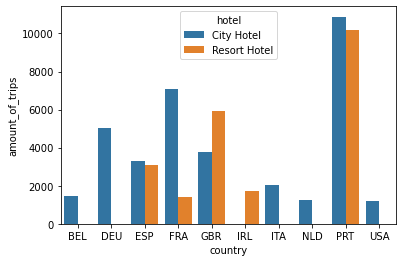

In [50]:
sns.barplot(x='country', y='amount_of_trips', hue='hotel', data=picture1)

In [19]:
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_full_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'stays_total_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'total_kids'],
      dtype='object')

In [60]:
#Визуализирую кол-во туров по кол-ву дней отдых в "верхней половине"

pic2_data= bookings.query('is_canceled == 0') \
    .groupby(['stays_total_nights', 'hotel'], as_index=False) \
    .agg({'is_canceled': 'count'}) \
    .rename(columns={'is_canceled': 'number_of_tours'}) \
    .query("number_of_tours>=number_of_tours.quantile(q=0.5)")

In [61]:
pic2_data

,stays_total_nights,hotel,number_of_tours
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
5,2,Resort Hotel,4488
6,3,City Hotel,11895
7,3,Resort Hotel,3830
8,4,City Hotel,7704
9,4,Resort Hotel,3321


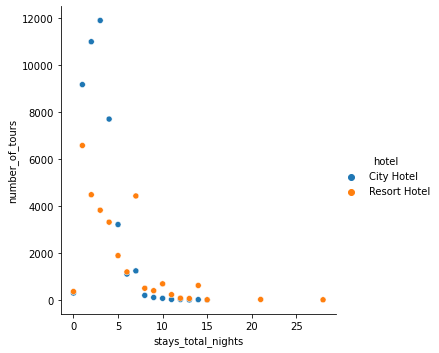

In [62]:
pic2 = sns.relplot(x='stays_total_nights', y='number_of_tours', kind='scatter', \
                   hue='hotel', data=pic2_data)